# ML Homework 2022
Valentina Margiotta () 
Sara Resta (225418)

In [1]:
# Run this code to make Jupyter print every
# printable statement and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

Importing the datasets

In [2]:
online_shoppers = pd.read_csv("data/online_shoppers_intention.csv")
online_shoppers_training = pd.read_csv("data/training_set_online_shoppers_intention.csv")
online_shoppers_test = pd.read_csv("data/test_set_online_shoppers_intention.csv")
online_shoppers.head()
online_shoppers_training.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,3496,0,0.000000,0,0.0,5,19.000000,0.000000,0.080000,0.000000,0.6,May,2,2,1,3,Returning_Visitor,False,False
1,9415,5,158.700000,0,0.0,51,1364.266667,0.007692,0.011987,0.000000,0.0,Nov,3,2,3,2,Returning_Visitor,True,False
2,9419,7,87.916667,1,0.0,46,1621.025379,0.004082,0.020544,6.023523,0.0,Dec,1,1,3,2,Returning_Visitor,False,False
3,3837,1,4.000000,0,0.0,37,1296.942857,0.013889,NaN,0.000000,0.8,May,2,2,4,2,Returning_Visitor,False,False
4,7305,2,132.400000,0,0.0,11,296.300000,0.000000,NaN,0.000000,0.0,Sep,2,4,3,2,New_Visitor,False,False


Assign "categorical" to type of variables which are considered like that, so that they cannot be considered as "numeric"

In [3]:
online_shoppers['Month']=online_shoppers['Month'].astype('category')
online_shoppers['OperatingSystems']=online_shoppers['OperatingSystems'].astype('category')
online_shoppers['Browser']=online_shoppers['Browser'].astype('category')
online_shoppers['Region']=online_shoppers['Region'].astype('category')
online_shoppers['TrafficType']=online_shoppers['TrafficType'].astype('category')
online_shoppers['VisitorType']=online_shoppers['VisitorType'].astype('category')
online_shoppers['Weekend']=online_shoppers['Weekend'].astype('category')

# 1. Dataset inspection

First of all, we do some visual inspection on our data.

['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec']
Categories (10, object): ['Aug', 'Dec', 'Feb', 'Jul', ..., 'May', 'Nov', 'Oct', 'Sep']

<AxesSubplot:xlabel='Month'>

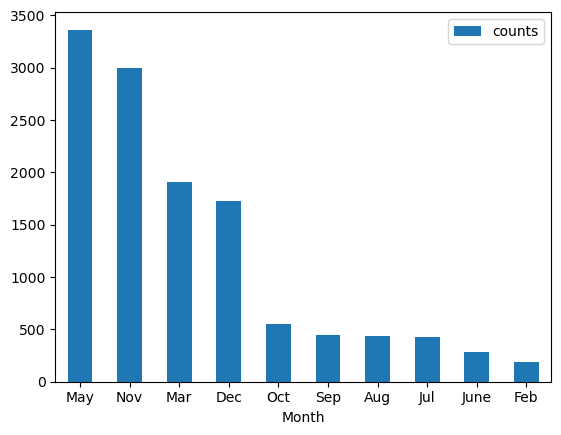

In [14]:
# Month --> categorical
online_shoppers['Month'].unique() # 10 categories
df = pd.DataFrame({'Month':list(online_shoppers['Month'].value_counts().index), 
                   'counts':list(online_shoppers['Month'].value_counts().values)})
df.plot.bar(x='Month', y='counts', rot=0)

[1, 2, 4, 3, 7, 6, 8, 5]
Categories (8, int64): [1, 2, 3, 4, 5, 6, 7, 8]

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

<AxesSubplot:xlabel='Operating system'>

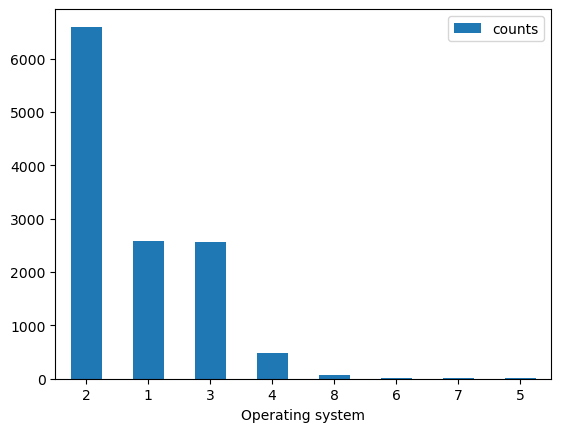

In [13]:
# OperatingSystems --> categorical
online_shoppers['OperatingSystems'].unique() # 8 categories
online_shoppers['OperatingSystems'].value_counts()
df = pd.DataFrame({'Operating system':list(online_shoppers['OperatingSystems'].value_counts().index), 
                   'counts':list(online_shoppers['OperatingSystems'].value_counts().values)})
df.plot.bar(x='Operating system', y='counts', rot=0)

[1, 2, 3, 4, 5, ..., 8, 9, 12, 13, 11]
Length: 13
Categories (13, int64): [1, 2, 3, 4, ..., 10, 11, 12, 13]

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

<AxesSubplot:xlabel='Browser'>

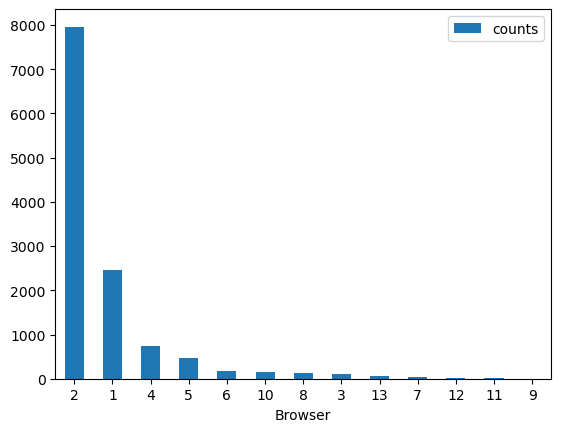

In [15]:
# Browser --> categorical
online_shoppers['Browser'].unique() # 13 categories
online_shoppers['Browser'].value_counts()
df = pd.DataFrame({'Browser':list(online_shoppers['Browser'].value_counts().index), 
                   'counts':list(online_shoppers['Browser'].value_counts().values)})
df.plot.bar(x='Browser', y='counts', rot=0)

[1, 9, 2, 3, 4, 5, 6, 7, 8]
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 9]

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region'>

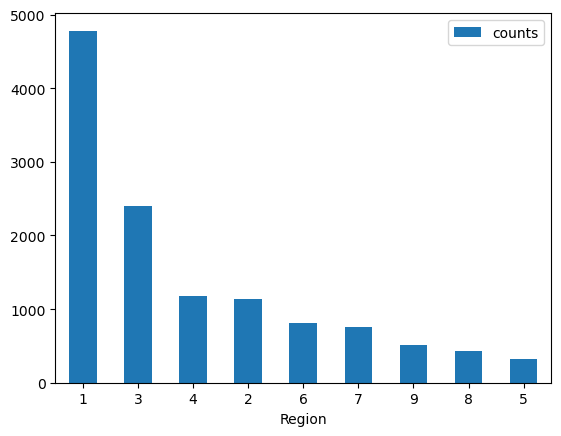

In [16]:
# Region --> categorical
online_shoppers['Region'].unique() # 9 categories
online_shoppers['Region'].value_counts()
df = pd.DataFrame({'Region':list(online_shoppers['Region'].value_counts().index), 
                   'counts':list(online_shoppers['Region'].value_counts().values)})
df.plot.bar(x='Region', y='counts', rot=0)

[1, 2, 3, 4, 5, ..., 18, 19, 16, 17, 20]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 17, 18, 19, 20]

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

<AxesSubplot:xlabel='Traffic type'>

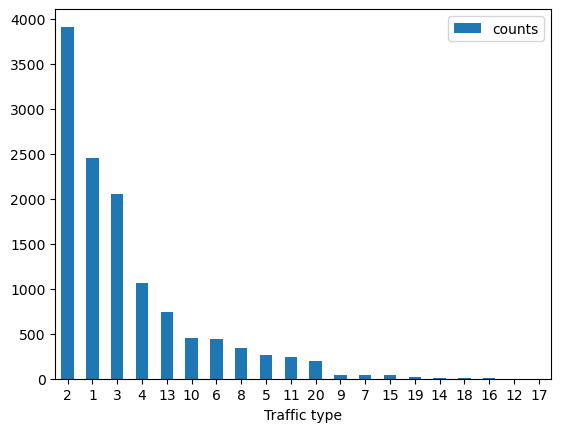

In [17]:
# TrafficType --> categorical
online_shoppers['TrafficType'].unique() # 20 categories
online_shoppers['TrafficType'].value_counts()
df = pd.DataFrame({'Traffic type':list(online_shoppers['TrafficType'].value_counts().index), 
                   'counts':list(online_shoppers['TrafficType'].value_counts().values)})
df.plot.bar(x='Traffic type', y='counts', rot=0)

['Returning_Visitor', 'New_Visitor', 'Other']
Categories (3, object): ['New_Visitor', 'Other', 'Returning_Visitor']

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

<AxesSubplot:xlabel='Visitor type'>

<AxesSubplot:ylabel='Visitor type'>

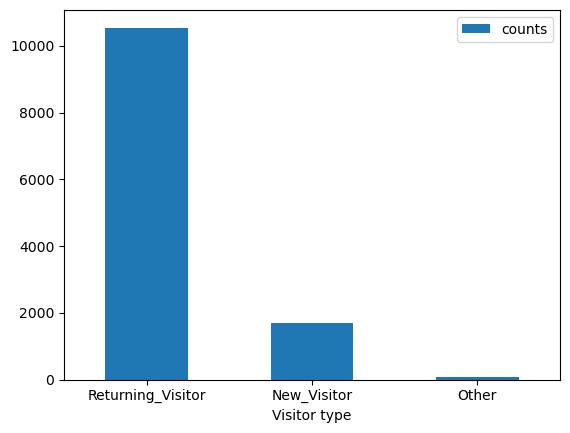

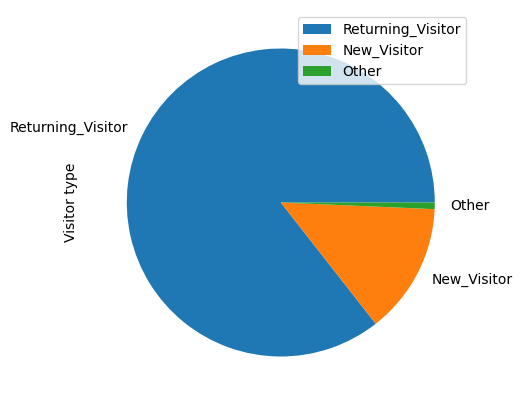

In [32]:
# VisitorType --> categorical
online_shoppers['VisitorType'].unique() # 3 categories
online_shoppers['VisitorType'].value_counts()
df_bar = pd.DataFrame({'Visitor type':list(online_shoppers['VisitorType'].value_counts().index), 
                       'counts':list(online_shoppers['VisitorType'].value_counts().values)})
df_bar.plot.bar(x='Visitor type', y='counts', rot=0)
df_pie = pd.DataFrame({'Visitor type': list(online_shoppers['VisitorType'].value_counts().values)},
                  index=list(online_shoppers['VisitorType'].value_counts().index))
df_pie.plot.pie(y='Visitor type', figsize=(5, 5))

[False, True]
Categories (2, object): [False, True]

False    9462
True     2868
Name: Weekend, dtype: int64

<AxesSubplot:xlabel='Weekend'>

<AxesSubplot:ylabel='Weekend'>

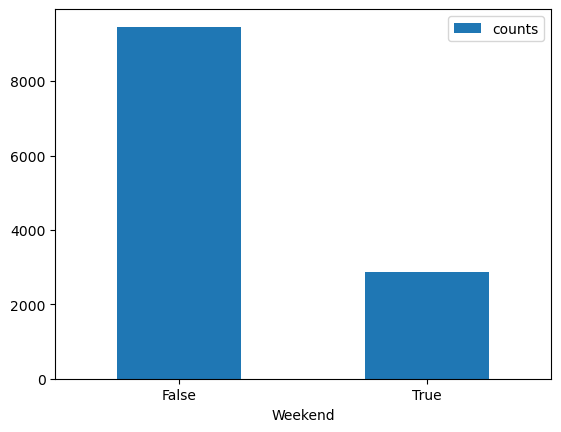

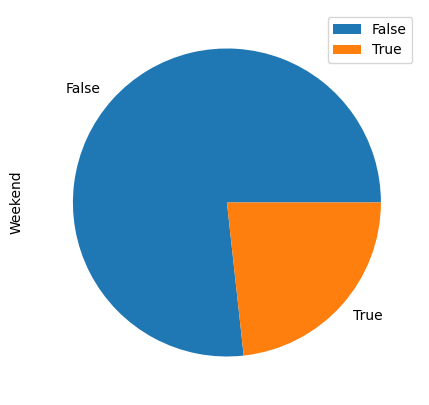

In [33]:
# Weekend --> categorical
online_shoppers['Weekend'].unique() # 2 categories (binary)
online_shoppers['Weekend'].value_counts()
df_bar = pd.DataFrame({'Weekend':list(online_shoppers['Weekend'].value_counts().index), 
                       'counts':list(online_shoppers['Weekend'].value_counts().values)})
df_bar.plot.bar(x='Weekend', y='counts', rot=0)
df_pie = pd.DataFrame({'Weekend': list(online_shoppers['Weekend'].value_counts().values)},
                  index=list(online_shoppers['Weekend'].value_counts().index))
df_pie.plot.pie(y='Weekend', figsize=(5, 5))

In [125]:
df = pd.DataFrame({'Administrative':online_shoppers['Administrative'],
                   'Administrative_Duration':online_shoppers['Administrative_Duration'],
                   'Informational':online_shoppers['Informational'],
                   'Informational_Duration':online_shoppers['Informational_Duration'],
                   'ProductRelated':online_shoppers['ProductRelated'], 
                   'ProductRelated_Duration':online_shoppers['ProductRelated_Duration'],
                   'BounceRates':online_shoppers['BounceRates'], 
                   'ExitRates':online_shoppers['ExitRates'],
                   'PageValues':online_shoppers['PageValues'], 
                   'SpecialDay':online_shoppers['SpecialDay']}) 
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


,Administrative,Informational,ProductRelated
count,12330.000000,12330.000000,12330.000000
mean,2.315166,0.503569,31.731468
std,3.321784,1.270156,44.475503
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000
50%,1.000000,0.000000,18.000000
75%,4.000000,0.000000,38.000000
max,27.000000,24.000000,705.000000


<AxesSubplot:>

(-1.0, 15.0)

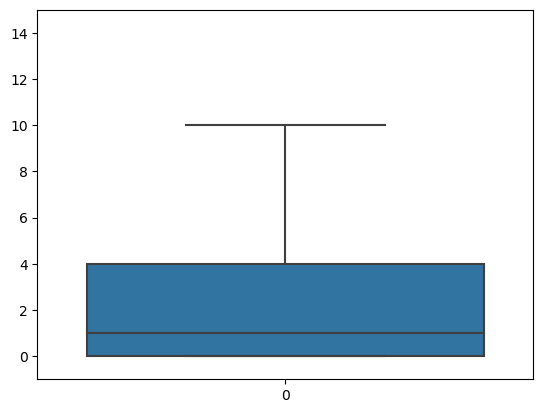

In [106]:
df = pd.DataFrame({'Administrative':online_shoppers['Administrative'], 
                   'Informational':online_shoppers['Informational'],
                   'ProductRelated':online_shoppers['ProductRelated']}) 
df.describe()
# Administrative --> continue
sns.boxplot(data=df['Administrative'], orient='v', fliersize = 0)
plt.ylim(-1, 15)
# toglie fliersize nel boxplot per visualizzare gli outliers

<AxesSubplot:>

(-1.0, 5.0)

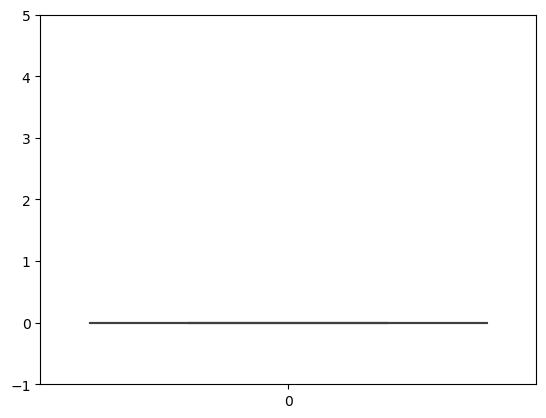

In [80]:
# Informational --> continue
sns.boxplot(data=df['Informational'], orient='v', fliersize = 0)
plt.ylim(-1, 5)

<AxesSubplot:>

(-1.0, 100.0)

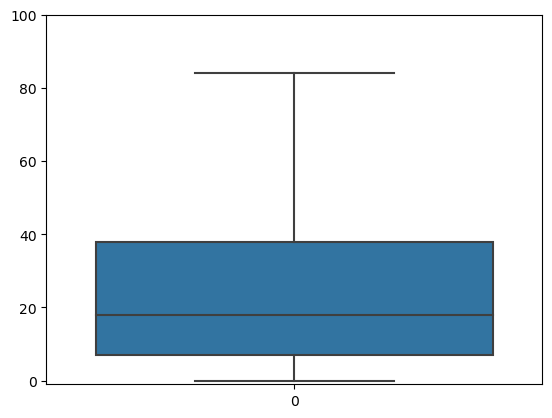

In [84]:
# ProductRelated --> continue
sns.boxplot(data=df['ProductRelated'], orient='v', fliersize = 0)
plt.ylim(-1, 100)

<AxesSubplot:>

(-10.0, 100.0)

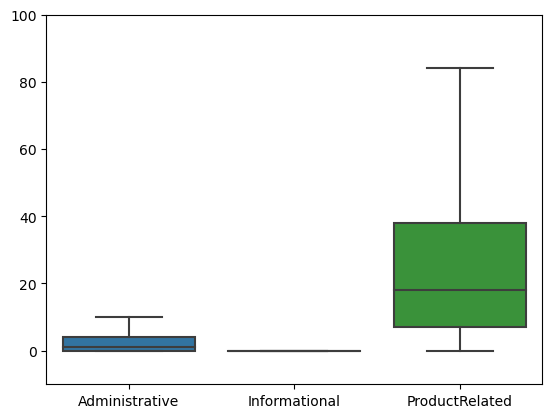

In [109]:
sns.boxplot(data=df, orient='v', fliersize = 0)
plt.ylim(-10, 100)

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
count,12330.000000,12330.000000,12330.000000
mean,80.818611,34.472398,1194.746220
std,176.779107,140.749294,1913.669288
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,184.137500
50%,7.500000,0.000000,598.936905
75%,93.256250,0.000000,1464.157214
max,3398.750000,2549.375000,63973.522230


<AxesSubplot:>

(-10.0, 300.0)

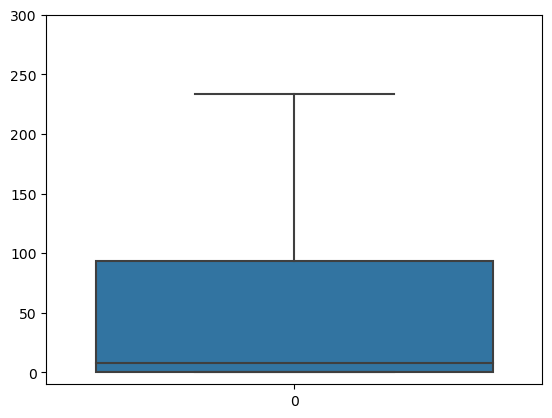

In [102]:
df = pd.DataFrame({'Administrative_Duration':online_shoppers['Administrative_Duration'], 
                   'Informational_Duration':online_shoppers['Informational_Duration'],
                   'ProductRelated_Duration':online_shoppers['ProductRelated_Duration']}) 
df.describe()
# Administrative_Duration --> continue
sns.boxplot(data=df['Administrative_Duration'], orient='v', fliersize = 0)
plt.ylim(-10, 300)

<AxesSubplot:>

(-1.0, 5.0)

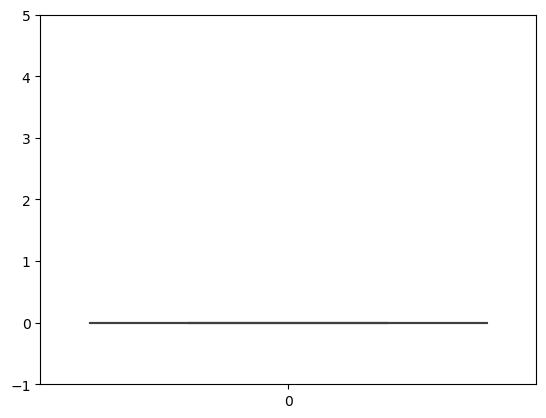

In [103]:
# Informational_Duration --> continue
sns.boxplot(data=df['Informational_Duration'], orient='v', fliersize = 0)
plt.ylim(-1, 5)

<AxesSubplot:>

(-100.0, 4000.0)

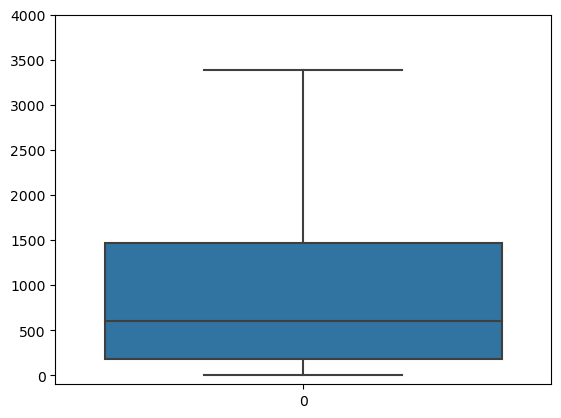

In [104]:
# ProductRelated_Duration --> continue
sns.boxplot(data=df['ProductRelated_Duration'], orient='v', fliersize = 0)
plt.ylim(-100, 4000)

<AxesSubplot:>

(-100.0, 4000.0)

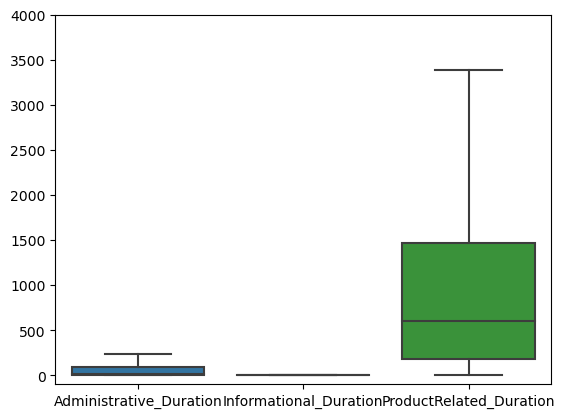

In [105]:
sns.boxplot(data=df, orient='v', fliersize = 0)
plt.ylim(-100, 4000)

,BounceRates,ExitRates
count,12330.000000,12330.000000
mean,0.022191,0.043073
std,0.048488,0.048597
min,0.000000,0.000000
25%,0.000000,0.014286
50%,0.003112,0.025156
75%,0.016813,0.050000
max,0.200000,0.200000


<AxesSubplot:>

(-1.0, 5.0)

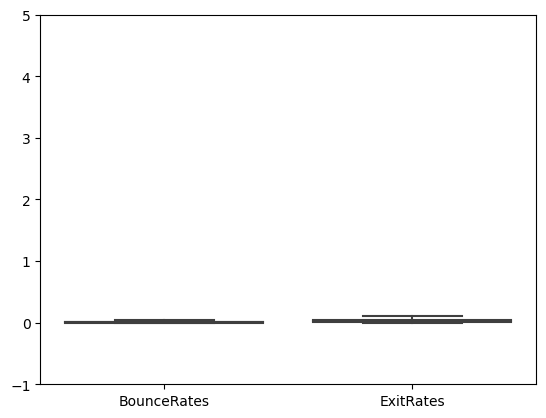

In [119]:
df = pd.DataFrame({'BounceRates':online_shoppers['BounceRates'], 
                   'ExitRates':online_shoppers['ExitRates']}) 
df.describe()
# BounceRates and ExitRates --> continues
sns.boxplot(data=df[['BounceRates', 'ExitRates']], orient='v', fliersize=0)
plt.ylim(-1, 5)

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

<AxesSubplot:>

(-1.0, 5.0)

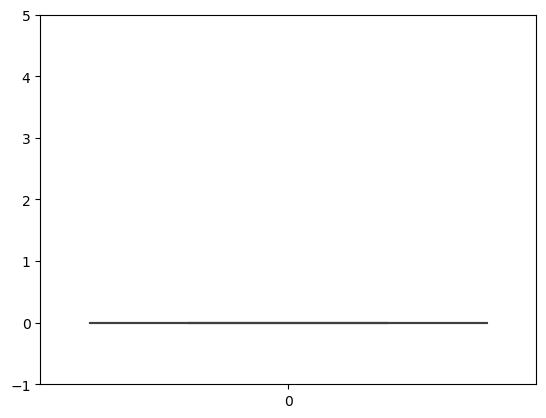

In [123]:
# PageValues --> continue
online_shoppers['PageValues'].describe()
sns.boxplot(data=online_shoppers['PageValues'], orient='v', fliersize=0)
plt.ylim(-1, 5)

count    12330.000000
mean         0.061427
std          0.198917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64

<AxesSubplot:>

(-1.0, 5.0)

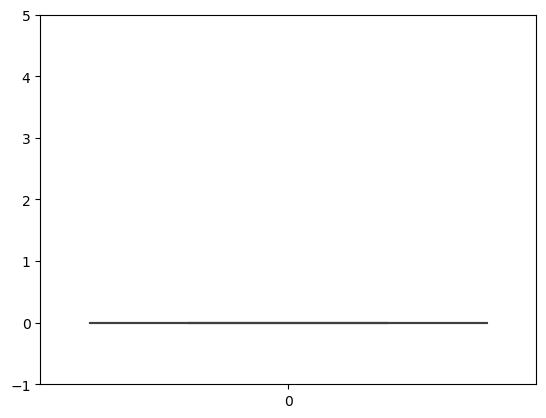

In [124]:
# SpecialDay --> continue
online_shoppers['SpecialDay'].describe()
sns.boxplot(data=online_shoppers['SpecialDay'], orient='v', fliersize=0)
plt.ylim(-1, 5)

We want to know which are the most correlated variables with the target class and if there is any correlation between the variables.
We start considering if there is a correlation between some variables

We firstly check if there is any correlation printing the heatmap to see if there is any correlation between the dataset features. The most correlated variables are:
* Administrative, Administrative_Duration
* Informational, Informational_Duration
* ProductRelated, ProductRelated_Duration
* BounceRates (% of visitors that leave the website without viewing any other page), ExitRates (% of visitors that leave the website from that page without purchasing)

<AxesSubplot:>

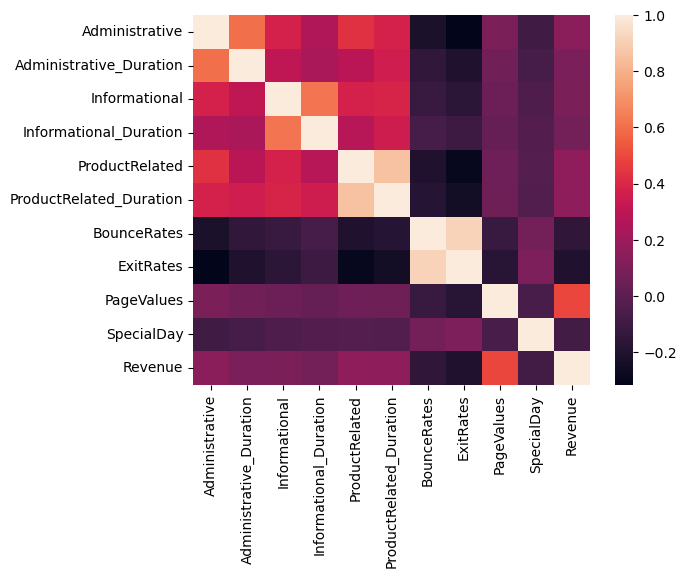

In [6]:
sns.heatmap(online_shoppers.corr())

Now we print a scatterplot for the pairs of variables for which we found a correlation

<AxesSubplot:xlabel='Administrative', ylabel='Administrative_Duration'>

<AxesSubplot:xlabel='Informational', ylabel='Informational_Duration'>

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

<AxesSubplot:xlabel='BounceRates', ylabel='ExitRates'>

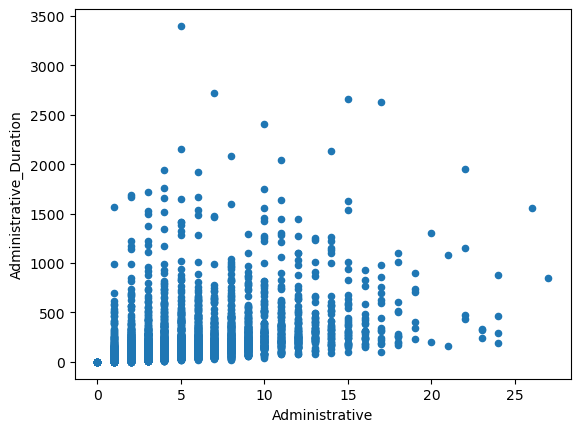

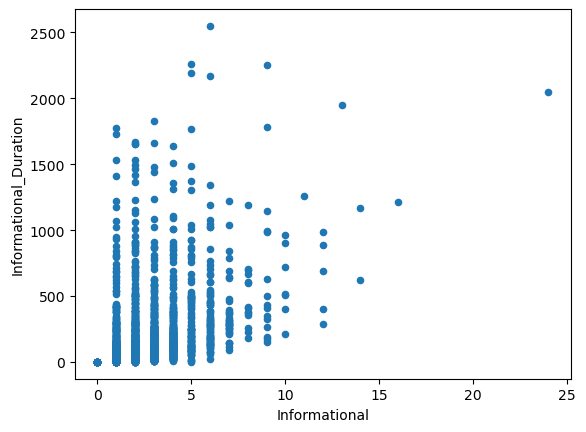

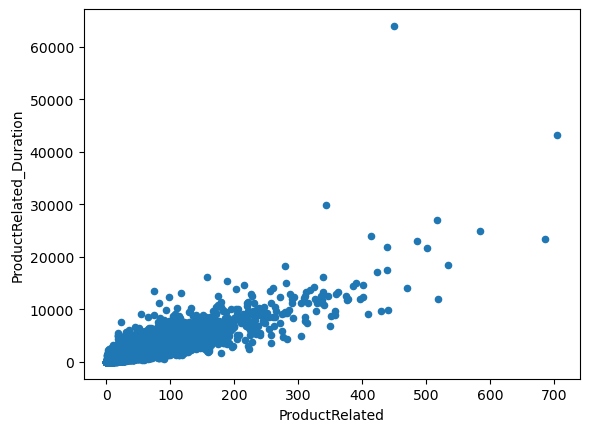

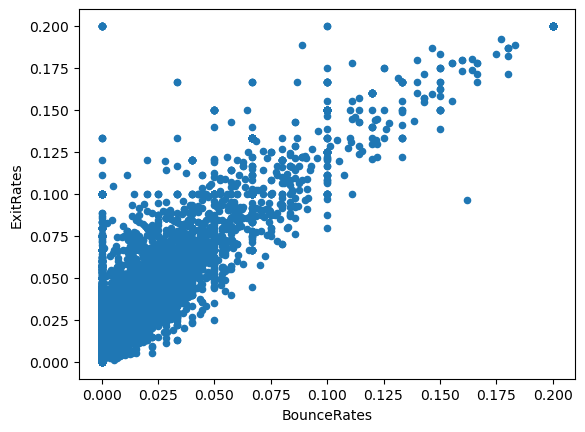

In [25]:
online_shoppers.plot.scatter('Administrative','Administrative_Duration')
online_shoppers.plot.scatter('Informational','Informational_Duration')
online_shoppers.plot.scatter('ProductRelated','ProductRelated_Duration')
online_shoppers.plot.scatter('BounceRates','ExitRates')

In [61]:
online_shoppers['Region'].value_counts()
online_shoppers['Region'].astype('category')

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

0        1
1        1
2        9
3        2
4        1
        ..
12325    1
12326    1
12327    1
12328    3
12329    1
Name: Region, Length: 12330, dtype: category
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 9]